Take the results of synthetic_classes.py. Plot the histograms of error values of the training and test classes to evaluate the interclass separation and hence the performance of the algorithm.

In [27]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math
from collections import Counter
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import segment_cluster_zscore as sc
import importlib
importlib.reload(sc)
np.random.seed(0)
from scipy.stats import zscore


In [21]:
results_file="valid_results_20190604_bp5.csv"
k_clusters=[150]
seg_lens=[10,50,100,150,200]

#"normal"/training lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier"/test lightcurves
sine_file=np.loadtxt("synthetic_sines_range_wide.csv", delimiter=',')

no. clusters:  150 segment length:  10
Mean rho error: 	 186.61864522030928 Max rho error:  403.7582477200089


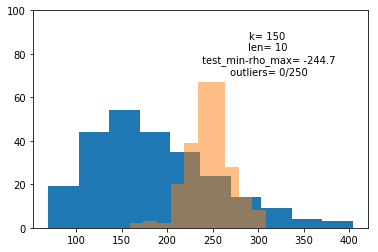

Mean test error: 	 246.49589634910092
Min test-max rho error:  -244.71335050968102
no. misclassified observations:  250

no. clusters:  150 segment length:  50
Mean rho error: 	 430.1290387063551 Max rho error:  1471.9490622605013


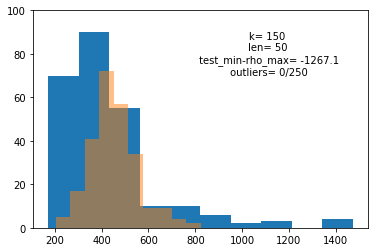

Mean test error: 	 453.3695575158137
Min test-max rho error:  -1267.1050315787243
no. misclassified observations:  250

no. clusters:  150 segment length:  100
Mean rho error: 	 651.182501472764 Max rho error:  1691.67158250599


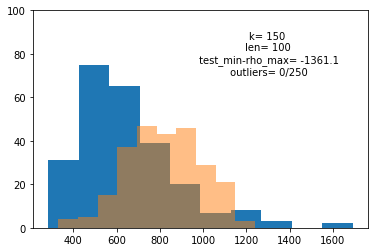

Mean test error: 	 821.3926179845856
Min test-max rho error:  -1361.0851318562236
no. misclassified observations:  250

no. clusters:  150 segment length:  150
Mean rho error: 	 786.7648664970995 Max rho error:  1548.2006637678135


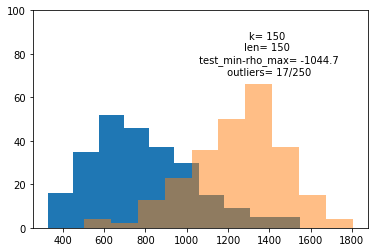

Mean test error: 	 1240.0463206455827
Min test-max rho error:  -1044.702101510904
no. misclassified observations:  233

no. clusters:  150 segment length:  200
Mean rho error: 	 951.0142936216014 Max rho error:  1815.7270285425263


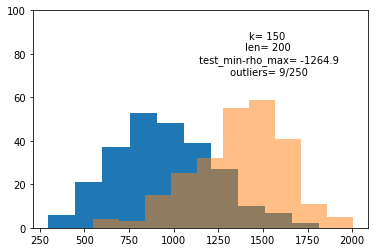

Mean test error: 	 1371.7341706513164
Min test-max rho error:  -1264.9292943664807
no. misclassified observations:  241



In [23]:
#enter the appropriate file name and hyperparameters used
results=np.loadtxt(results_file, dtype=float, delimiter=",")

for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        print("no. clusters: ", k_cluster, "segment length: ", seg_len)
        train=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==0)]
        max_rho=np.max(train[:,-1])
        print("Mean rho error: \t", np.mean(train[:,-1]), "Max rho error: ", max_rho)
        test=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==1)]
        min_test=np.min(test[:,-1])
        counter=0
        for t in test[:,-1]:
            if t<max_rho:
                counter+=1
        f = plt.figure()
        ax = f.add_subplot(111)
        plt.hist(train[:,-1])
        plt.hist(test[:,-1],alpha=0.5)
        #plt.xlim([0,1.2])
        plt.ylim([0,100])
        plt.text(0.7,0.8,"k= {}\nlen= {}\n test_min-rho_max= {}\n outliers= {}/250".format(k_cluster, seg_len, round(min_test-max_rho,1), 250-counter),
                 ha='center', va='center', transform=ax.transAxes)
        plt.show()
        
        print("Mean test error: \t", np.mean(test[:,-1]))
        print("Min test-max rho error: ", min_test-max_rho)
        print("no. misclassified observations: ", counter)
        
        print()

Take the results of synthetic_classes.py. Extract the indices of X best/worst reconstructions of training and test classes to understand how to improve the algorithm; how to error of reconstruction of the different classes more different. 

In [24]:
results=np.loadtxt(results_file, dtype=float, delimiter=",")
#structure of the lines in the file: cluster number index, segment length index, training=0 test=1, lightcurve index, error)

extract_x=5

output=[]
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        output.append(("no. clusters: ", k_cluster, "segment length: ", seg_len))
        output.append("worst/best training, wort/best test")
        train=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==0)]
        sorted_train=train[train[:,-1].argsort()]
        worst_train=sorted_train[-extract_x:,3].astype(int)
        best_train=sorted_train[0:extract_x,3].astype(int)        
        
        test=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==1)]
        sorted_test=test[test[:,-1].argsort()]
        worst_test=sorted_test[-extract_x:,3].astype(int)
        best_test=sorted_test[0:extract_x,3].astype(int)
        output.append(np.vstack((worst_train,best_train,worst_test,best_test)))

In [25]:
output

[('no. clusters: ', 150, 'segment length: ', 10),
 'worst/best training, wort/best test',
 array([[ 61, 152,  99, 168,  32],
        [177,  66, 181,  69, 149],
        [ 90, 118, 157, 220,  29],
        [122, 183, 190,  84,  73]]),
 ('no. clusters: ', 150, 'segment length: ', 50),
 'worst/best training, wort/best test',
 array([[196, 220, 194,  97, 199],
        [212, 149,  20, 182,  30],
        [ 69, 179, 242, 109, 157],
        [122,  73, 183, 190,  84]]),
 ('no. clusters: ', 150, 'segment length: ', 100),
 'worst/best training, wort/best test',
 array([[167, 196, 114, 199, 195],
        [205, 158, 187, 112, 115],
        [152, 119, 157,  69, 220],
        [183, 190, 122,  73, 105]]),
 ('no. clusters: ', 150, 'segment length: ', 150),
 'worst/best training, wort/best test',
 array([[ 60,  88, 200, 194, 199],
        [173, 212, 112, 181, 142],
        [ 24, 220,  27, 119, 150],
        [ 73, 183, 122, 190, 105]]),
 ('no. clusters: ', 150, 'segment length: ', 200),
 'worst/best traini

take the ids of the best and worst reconstructions, repeat and plot 

('no. clusters: ', 150, 'segment length: ', 10)
Worst reconstructions of ordinary lightcurves


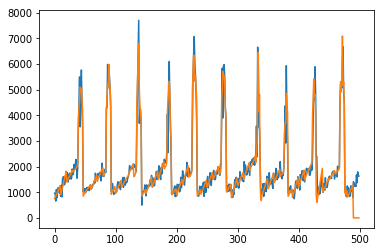

360.5842375112287


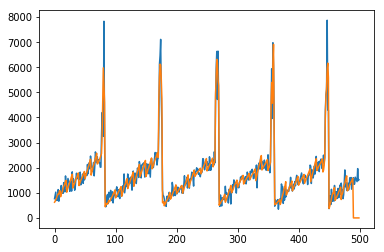

360.931026940382


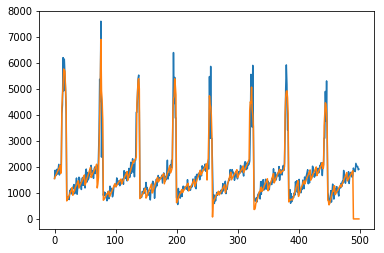

380.20648670701576


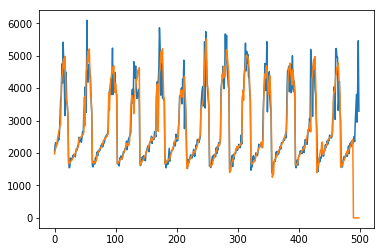

395.71847488643357


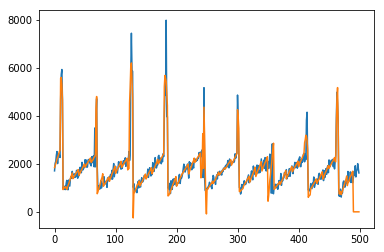

403.7582477200089
Best reconstructions of ordinary lightcurves


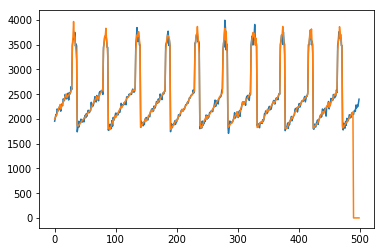

69.53293217018845


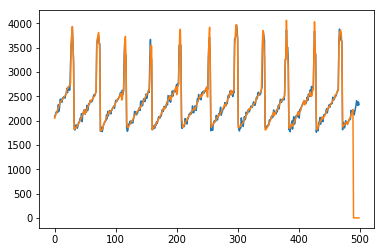

81.91530200199638


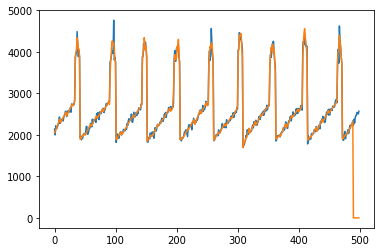

83.60711678556116


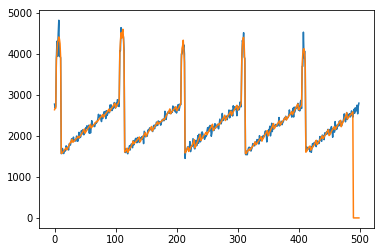

89.26812045790341


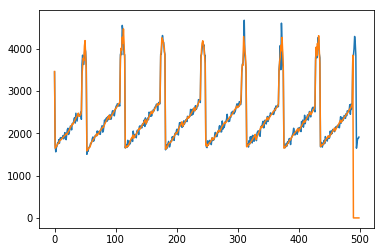

91.23177994155859
Worst reconstructions of outlier lightcurves


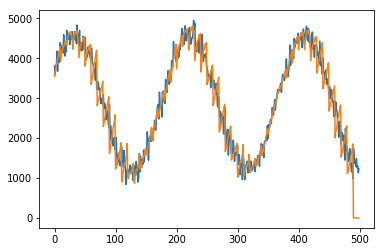

299.5189587791654


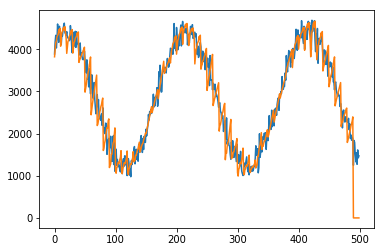

300.1409711485038


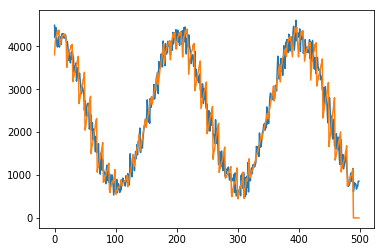

302.72737934837414


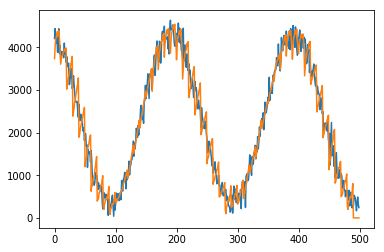

302.76339434704306


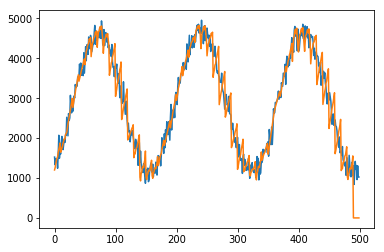

308.5174522280647
Best reconstructions of outlier lightcurves


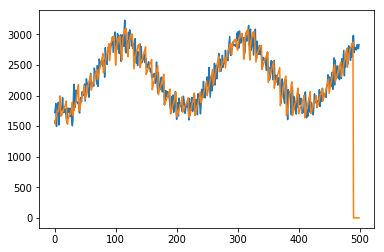

159.0448972103279


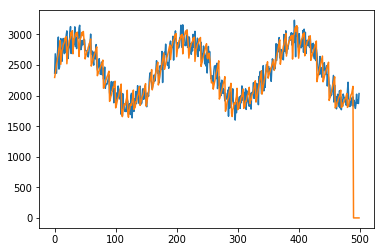

167.75669589585453


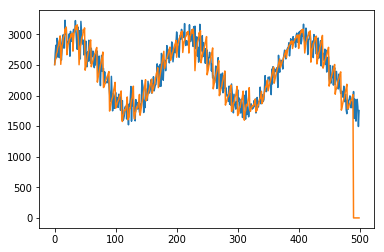

182.2240085721194


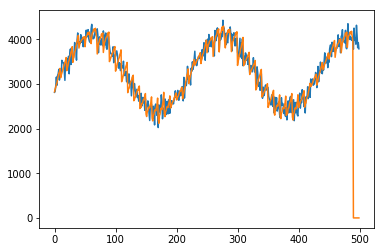

182.91751652060887


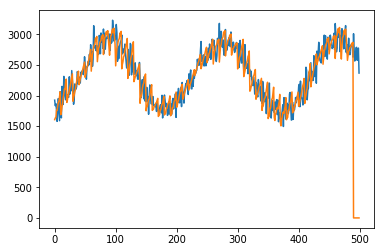

187.63881573587864
('no. clusters: ', 150, 'segment length: ', 50)
Worst reconstructions of ordinary lightcurves


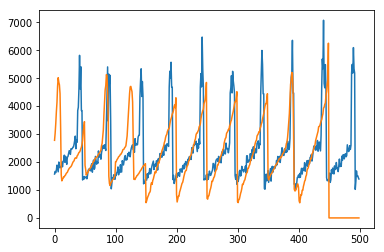

1203.1928081018912


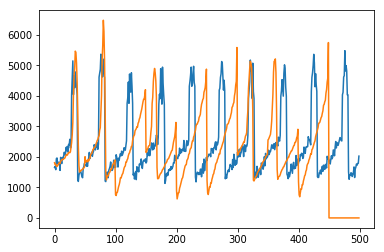

1398.4503992441098


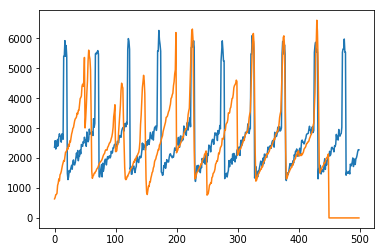

1399.702358323774


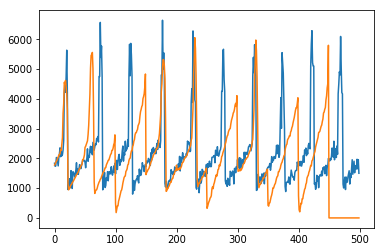

1444.7351705692772


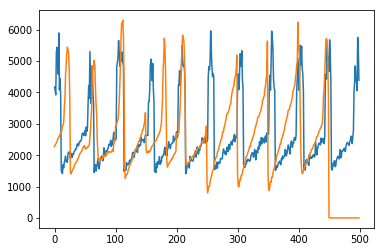

1471.9490622605013
Best reconstructions of ordinary lightcurves


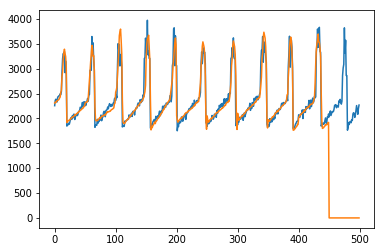

172.57254402330108


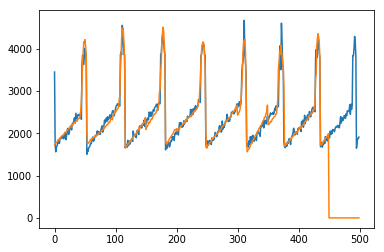

180.1558096880023


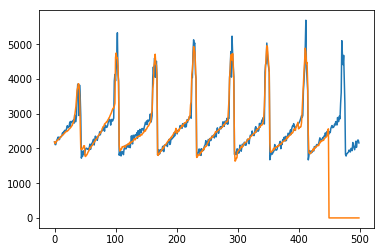

184.53871908441224


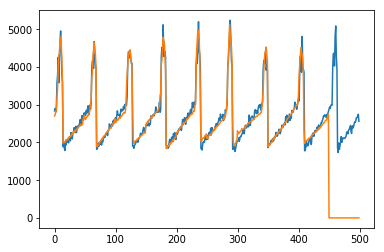

187.8134164341102


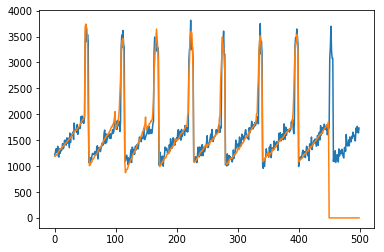

188.62301461471594
Worst reconstructions of outlier lightcurves


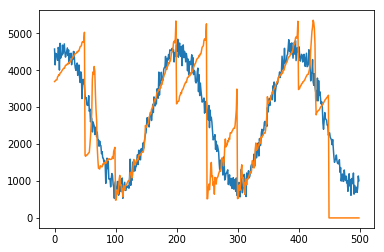

726.6568063204313


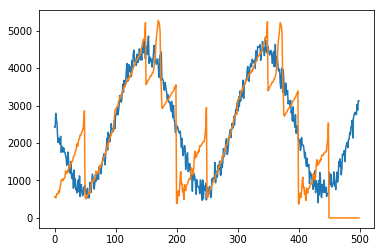

728.717583585226


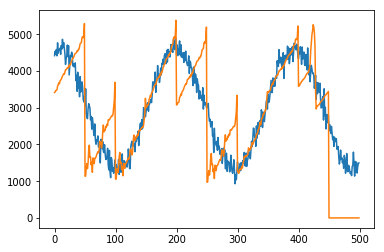

733.5585048754951


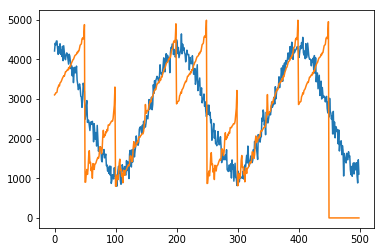

764.1027857251913


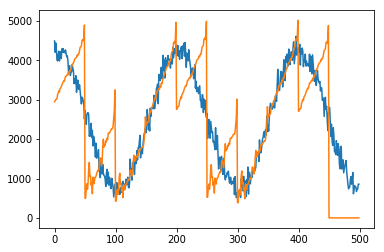

823.2618781870711
Best reconstructions of outlier lightcurves


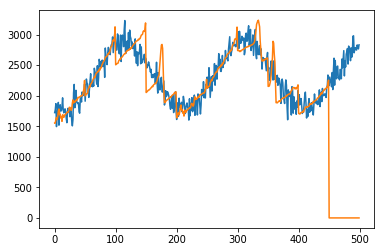

204.8440306817771


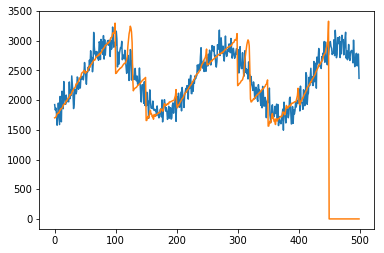

209.78349739857487


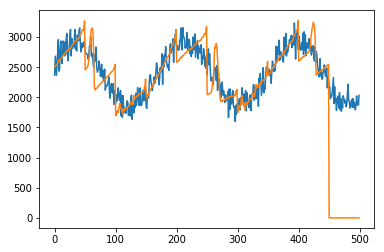

217.17373523219797


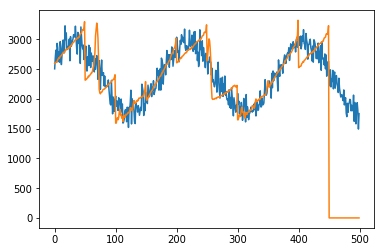

235.80912503131745


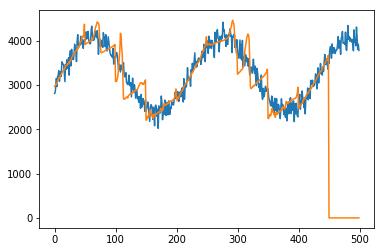

253.2330747899177
('no. clusters: ', 150, 'segment length: ', 100)
Worst reconstructions of ordinary lightcurves


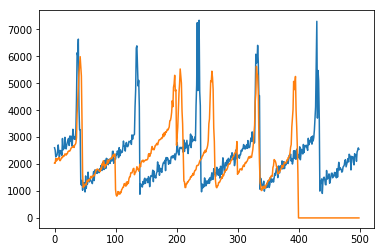

1326.8808188430087


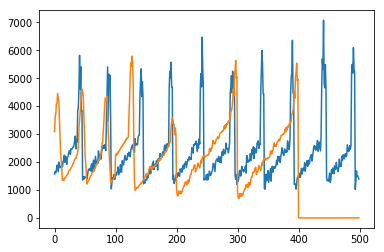

1360.7595360010926


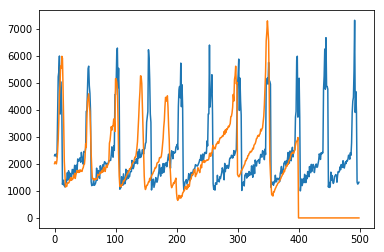

1382.1275027370789


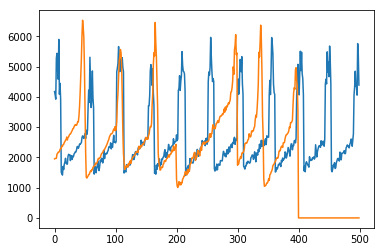

1598.0947037243209


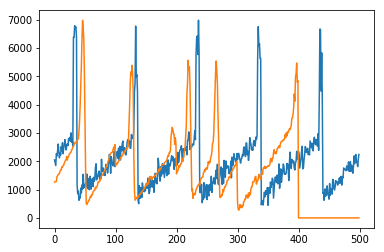

1691.67158250599
Best reconstructions of ordinary lightcurves


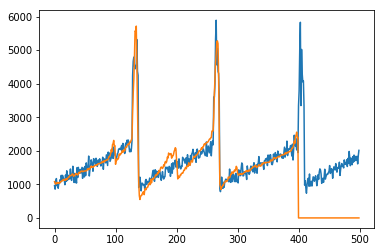

284.0270096498725


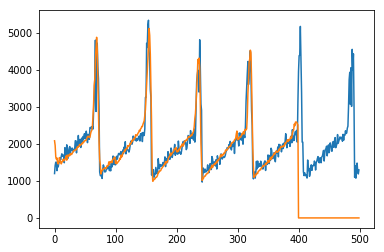

291.83113760581995


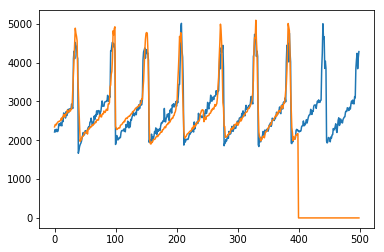

295.20240297360994


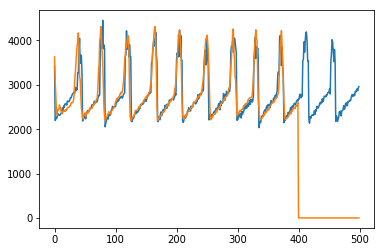

309.1994750986411


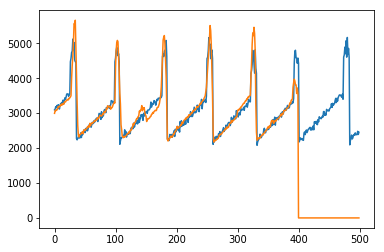

320.182649751913
Worst reconstructions of outlier lightcurves


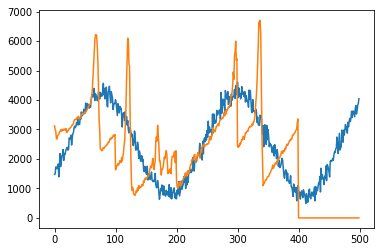

1137.2715699134455


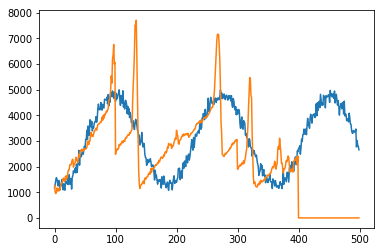

1145.4379383015705


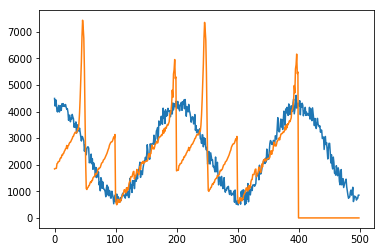

1202.401876810712


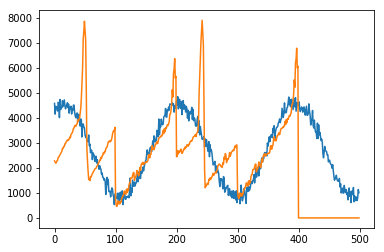

1215.8660702622137


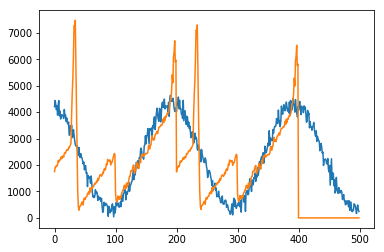

1240.1693364842988
Best reconstructions of outlier lightcurves


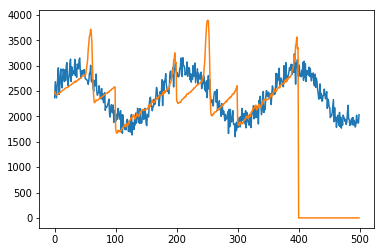

330.58645064976656


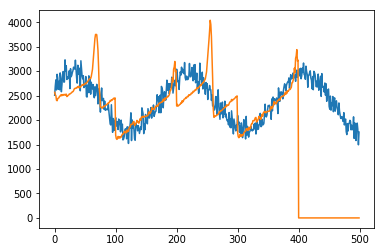

353.9053360160336


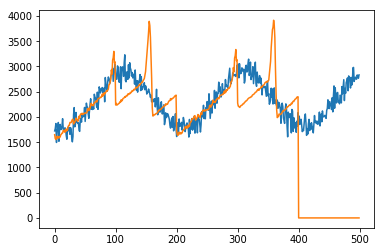

378.6761055585296


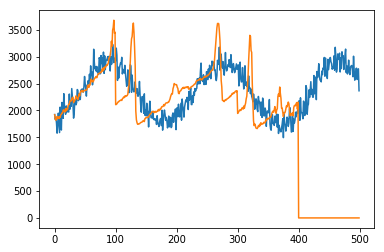

393.4394938055329


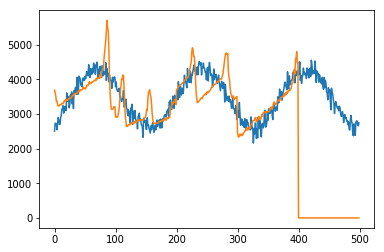

460.01273426012835
('no. clusters: ', 150, 'segment length: ', 150)
Worst reconstructions of ordinary lightcurves


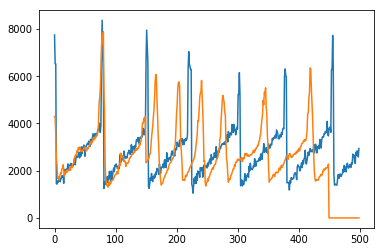

1445.0779691275543


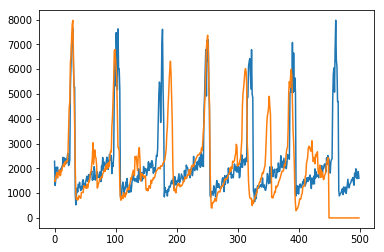

1449.9137898341987


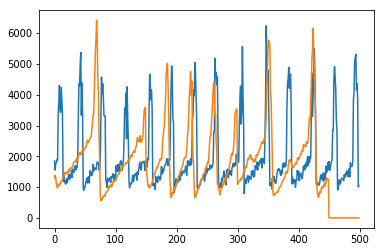

1492.1978227157254


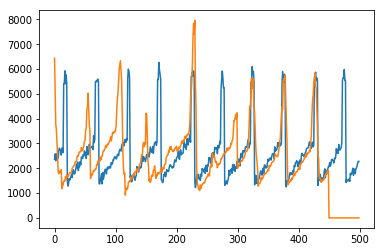

1506.1572581131052


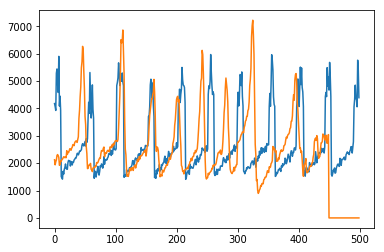

1548.2006637678135
Best reconstructions of ordinary lightcurves


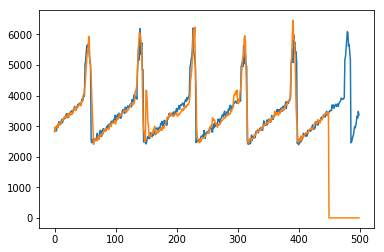

329.7359496617184


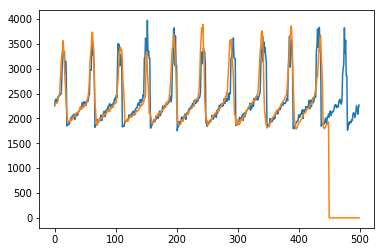

331.24434192160913


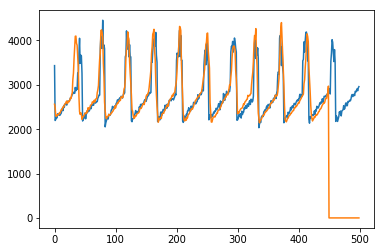

340.8159657947844


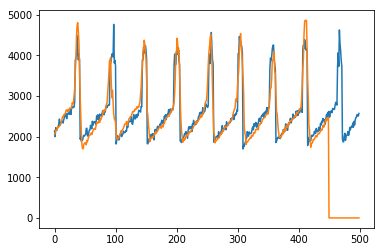

343.84952199025815


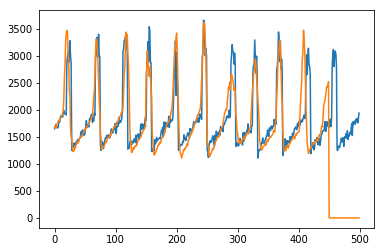

353.71422384777077
Worst reconstructions of outlier lightcurves


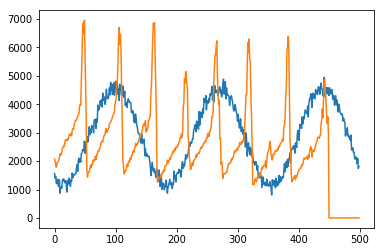

1658.4977537581033


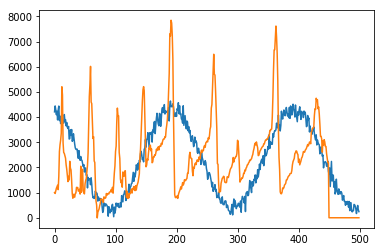

1684.7127712843903


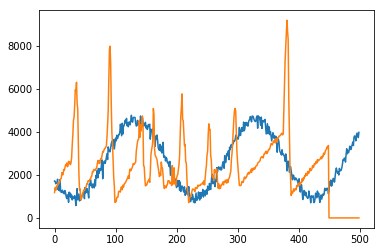

1740.2619201318976


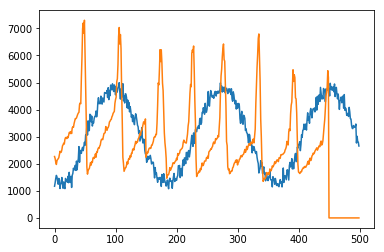

1772.1647541261545


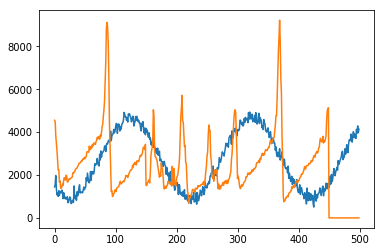

1803.614189261384
Best reconstructions of outlier lightcurves


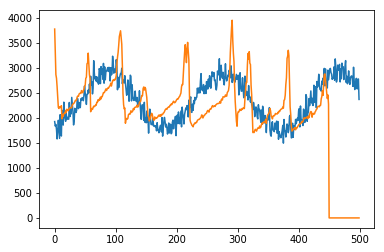

503.4985622569095


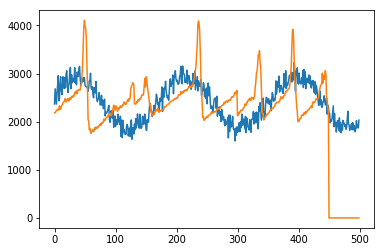

515.6816231264567


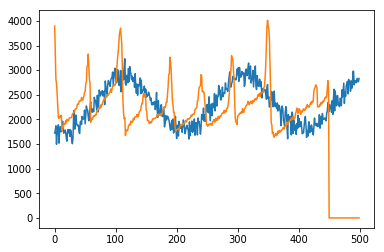

542.2133626943464


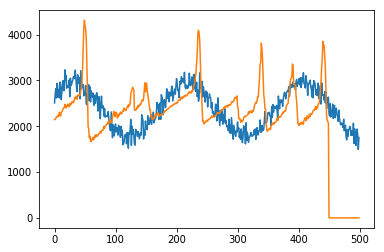

575.3794654194619


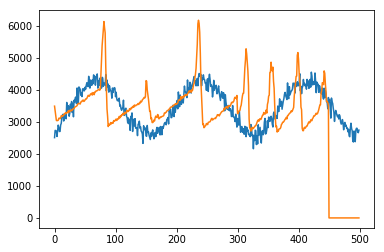

720.236780130829
('no. clusters: ', 150, 'segment length: ', 200)
Worst reconstructions of ordinary lightcurves


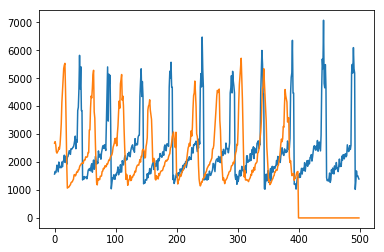

1603.3304390453432


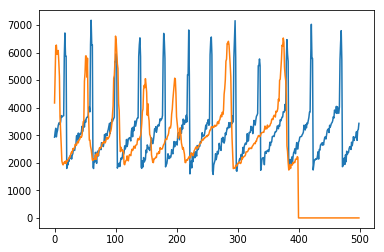

1619.4108116780544


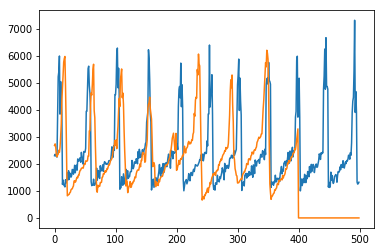

1637.2492223162017


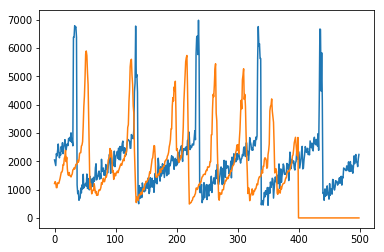

1712.662646818938


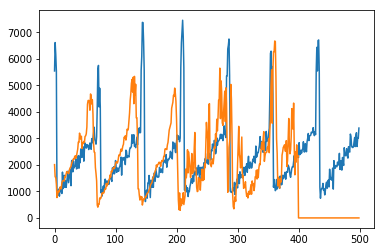

1815.7270285425263
Best reconstructions of ordinary lightcurves


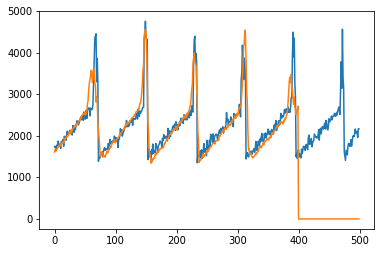

298.42883516570424


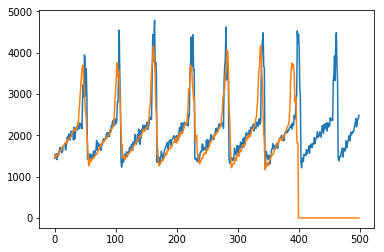

371.6040345721727


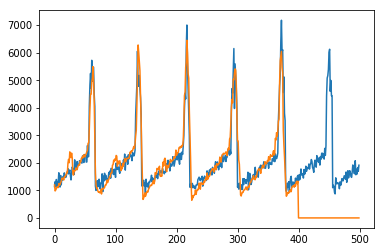

386.82586307000525


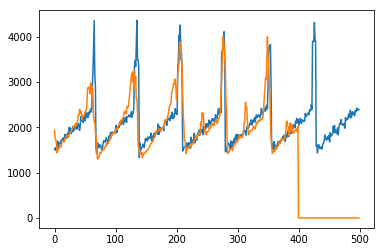

400.21672337643963


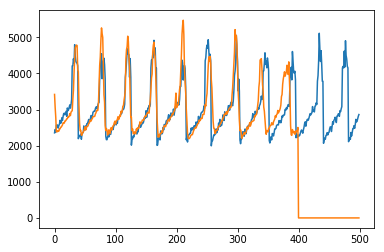

416.31165423917355
Worst reconstructions of outlier lightcurves


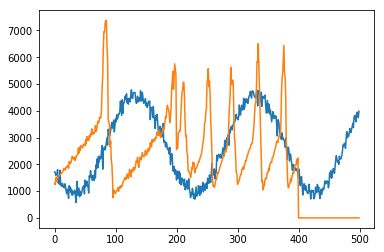

1926.6746330230874


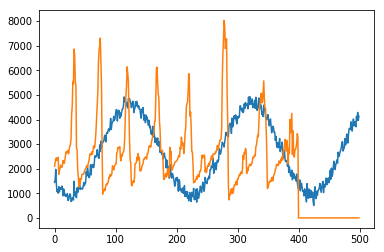

1959.2778343023074


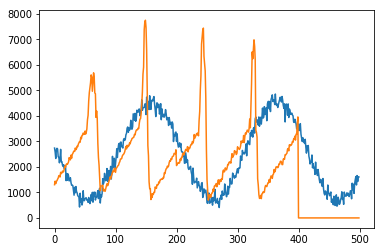

1968.7574206203344


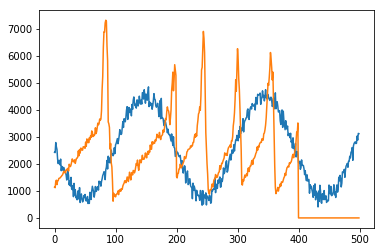

1985.1775879716158


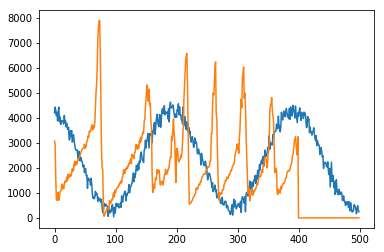

2002.8591346121943
Best reconstructions of outlier lightcurves


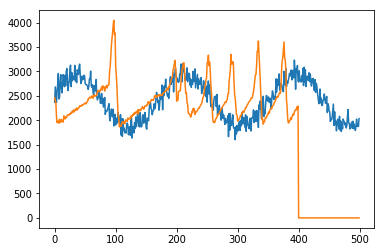

550.7977341760457


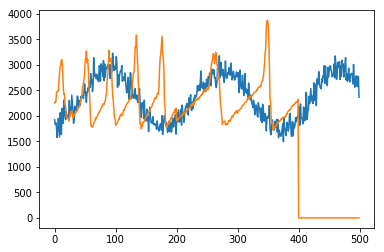

586.1575826280058


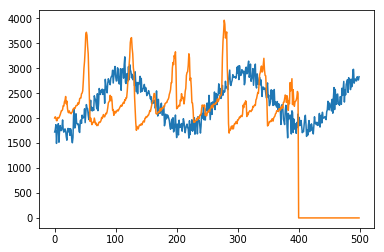

621.7795844479361


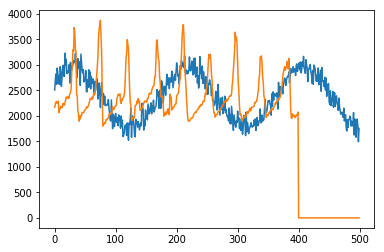

623.3867975061623


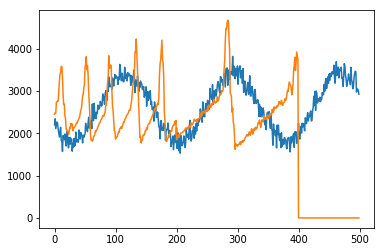

746.5906387632169


In [30]:

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))),test_size=0.25, random_state=0)

plot_worst_training=True
plot_best_training=True
plot_worst_test=True
plot_best_test=True

hyperparameter_set=0
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        print(("no. clusters: ", k_cluster, "segment length: ", seg_len))
        all_train_segments=[]
        for rho in rho_train:
            train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
            all_train_segments.append(train_segments)
        all_train_segments=np.vstack(all_train_segments)
        #cluster the segments
        cluster=KMeans(n_clusters=k_cluster, random_state=0)
        cluster.fit(zscore(all_train_segments))
        
        ids=output[int((hyperparameter_set+1)*3 -1)]
        def plot_reco(lc):
            valid_segments= sc.segmentation(lc, seg_len, seg_len , time_stamps=False)
            reco = sc.reconstruct(valid_segments, lc, cluster, rel_offset=False, seg_slide=seg_len)
            error=np.sqrt(np.mean((lc[0:-seg_len]-reco[0:-seg_len])**2))
            plt.plot(lc)
            plt.plot(reco)
            plt.show()
            print(error)
            return
        
        if plot_worst_training is True:
            print("Worst reconstructions of ordinary lightcurves")
            for lc_id in ids[0]:
                lc=rho_valid[lc_id]
                plot_reco(lc)
        
        if plot_best_training is True:
            print("Best reconstructions of ordinary lightcurves")
            for lc_id in ids[1]:
                lc=rho_valid[lc_id]
                plot_reco(lc)
        if plot_worst_test is True:
            print("Worst reconstructions of outlier lightcurves")
            for lc_id in ids[2]:
                lc=sine_file[lc_id]
                plot_reco(lc)
        if plot_best_test is True:
            print("Best reconstructions of outlier lightcurves")
            for lc_id in ids[3]:
                lc=sine_file[lc_id]
                plot_reco(lc)
        
        hyperparameter_set+=1

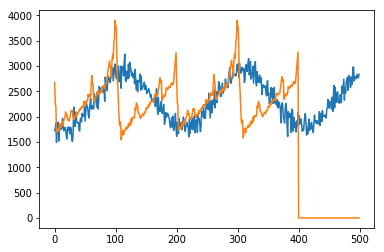

1125.68696544148


In [68]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math

from collections import Counter

from sklearn import tree


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import segment_cluster as sc
import importlib
importlib.reload(sc)


np.random.seed(0)

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier" lightcurves
sine_file=np.loadtxt("synthetic_sines_range_wide.csv", delimiter=',')

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)


#reco_classes=[]
k_cluster=150
seg_len=200

##train the model
#loop throught the light curves of a given class and segments them
all_train_segments=[]
for rho in rho_train:
    train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
    all_train_segments.append(train_segments)
all_train_segments=np.vstack(all_train_segments)
#cluster the segments
cluster=KMeans(n_clusters=k_cluster, random_state=0)
cluster.fit(all_train_segments)

        #reconstruction loop through light curves for every class other than rho              
sine=sine_file[122]
valid_segments= sc.segmentation(sine, seg_len, seg_len , time_stamps=False)
reco = sc.reconstruct(valid_segments, sine, cluster, rel_offset=False, seg_slide=seg_len)
plt.plot(sine)
plt.plot(reco)
plt.show()
print(np.sqrt(np.mean((reco-sine)**2)))
        
#         reco_error_ar=np.array(reco_error)
#         max_rho=reco_error_ar[(reco_error_ar[:,-1]==np.max(reco_error_ar[:,-1]))][0]
#         valid_segments= sc.segmentation(rho_valid[int(max_rho[3])], seg_len, seg_len , time_stamps=False)
#         reco, error = sc.reconstruct(valid_segments, rho_valid[int(max_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)
#         f = plt.figure()
#         ax = f.add_subplot(211)
#         plt.plot(rho_valid[int(max_rho[3])])
#         plt.plot(reco)
#         plt.ylim([0,10000])
#         plt.text(1,1,"k= {}\nlen= {}\n error= {}".format(k_cluster, seg_len, round(max_rho[-1],1)),
#                  ha='right', va='top', transform=ax.transAxes)
#         min_rho=reco_error_ar[(reco_error_ar[:,-1]==np.min(reco_error_ar[:,-1]))][0]
#         valid_segments= sc.segmentation(rho_valid[int(min_rho[3])], seg_len, seg_len , time_stamps=False)
#         reco, error = sc.reconstruct(valid_segments, rho_valid[int(min_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)


In [75]:
np.random.randint(500)

311

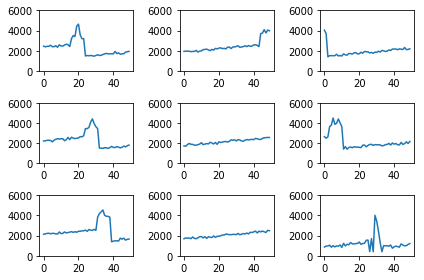

In [39]:
f = plt.figure()

for n, seg in enumerate(cluster.cluster_centers_[0:9]):
    ax = f.add_subplot(3,3,n+1)
    plt.plot(seg)
    plt.ylim(0,6000)
plt.tight_layout()
plt.show()
                              

In [11]:
interval

265.9890335025607

In [16]:
np.savetxt("synthetic_sines_wide.csv" ,sines, delimiter=',')

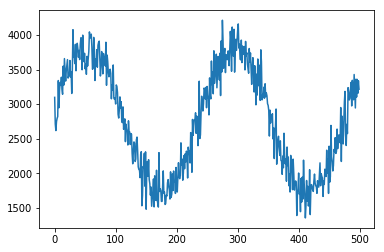

In [14]:
pred_centroid_index=kmeans_model.predict(np.array(segment).reshape(1, -1))[0]

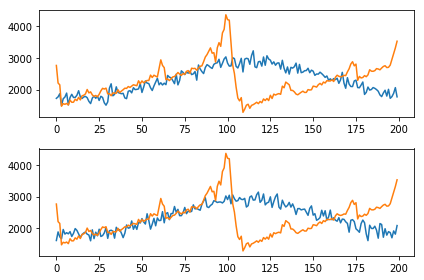

1125.68696544148


In [70]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math

from collections import Counter

from sklearn import tree


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import segment_cluster as sc
import importlib
importlib.reload(sc)


np.random.seed(0)

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier" lightcurves
sine_file=np.loadtxt("synthetic_sines_range_wide.csv", delimiter=',')

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)


#reco_classes=[]
k_cluster=150
seg_len=200


##train the model
#loop throught the light curves of a given class and segments them
all_train_segments=[]
for rho in rho_train:
    train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
    all_train_segments.append(train_segments)
all_train_segments=np.vstack(all_train_segments)
#cluster the segments
cluster=KMeans(n_clusters=k_cluster, random_state=0)
cluster.fit(all_train_segments)

        #reconstruction loop through light curves for every class other than rho              
sine=sine_file[122]
valid_segments= sc.segmentation(sine, seg_len, seg_len , time_stamps=False)
# for seg in valid_segments:
#     plt.plot(seg)
#     pred_centroid_index=cluster.predict(np.array(seg).reshape(1, -1))[0]
#     plt.plot(cluster.cluster_centers_[pred_centroid_index])
#     plt.show()
    
    
f = plt.figure()

for n, seg in enumerate(valid_segments[0:9]):
    ax = f.add_subplot(2,1,n+1)
    plt.plot(seg)
    pred_centroid_index=cluster.predict(np.array(seg).reshape(1, -1))[0]
    plt.plot(cluster.cluster_centers_[pred_centroid_index])
plt.tight_layout()
plt.show()
print(np.sqrt(np.mean((reco-sine)**2)))

(array([ 5., 12., 25., 33., 47., 48., 41., 26., 10.,  3.]),
 array([162.8435388 , 170.38372216, 177.92390552, 185.46408889,
        193.00427225, 200.54445561, 208.08463898, 215.62482234,
        223.16500571, 230.70518907, 238.24537243]),
 <a list of 10 Patch objects>)

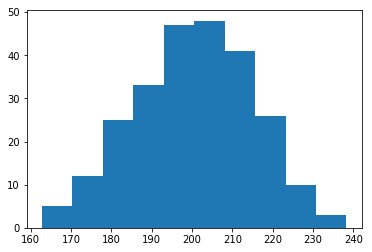

In [14]:
plt.hist(np.random.normal(200, 15,250))

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split


#synthesise sine waves that span the same range as the synthetic rho

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)
list_mins=np.min(rho_train, axis=1)
list_maxs=np.max(rho_train, axis=1)

small_maxs=list_maxs[np.where(list_maxs<5000)[0]]

#"outlier" lightcurves
no_sines=250
lc_len=500
sines=np.zeros((no_sines,lc_len))
for sine in range(no_sines):
    #wavelength of 30-160
    start=np.random.rand()*2*np.pi
    interval=np.random.normal(200, 15)
    xs=np.linspace(start,(lc_len/interval)*2*np.pi+start, num=500)
    ys=np.sin(xs)
    range_ind=np.random.randint(len(small_maxs))
    ys+=1
    ys=(ys/2)*(small_maxs[range_ind]-list_mins[range_ind])
    ys+=np.random.normal(0,200 ,len(ys))
    if np.min(ys)<0:
        ys+=abs(np.min(ys))
    ys*=(small_maxs[range_ind]-list_mins[range_ind])/np.max(ys)
    ys+=list_mins[range_ind]
    sines[sine,:]=ys

k_clusters:  [150, 200, 250] 
seg_lens:  [10, 20, 30, 40]


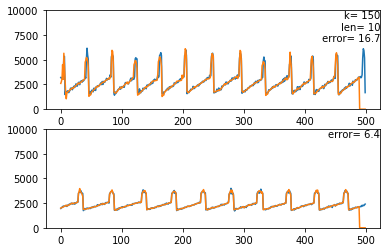

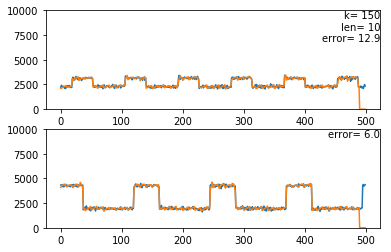

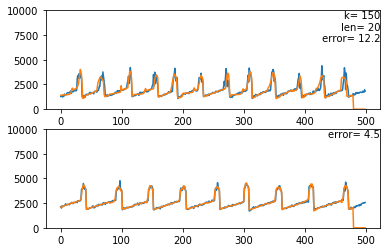

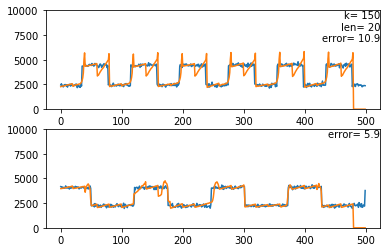

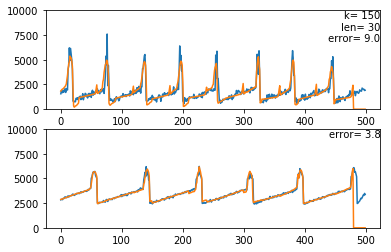

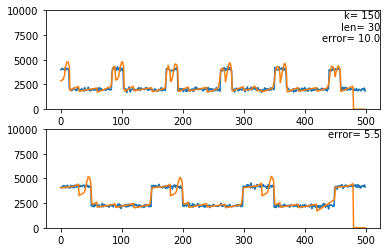

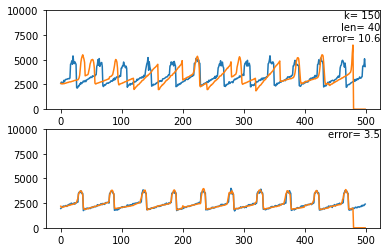

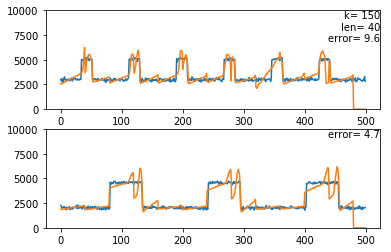

KeyboardInterrupt: 

In [65]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math

from collections import Counter

from sklearn import tree


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import segment_cluster as sc
import importlib
importlib.reload(sc)


np.random.seed(0)

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier" lightcurves
sine_file=np.loadtxt("synthetic_boxes_thick.csv", delimiter=',')

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)


# inverted_rho=np.copy(rho_valid)
# sine_file=inverted_rho
# for n, in_rho in enumerate(inverted_rho):
#     rho_mean=np.mean(in_rho)
#     inverted_rho[n]-=np.mean(in_rho)
#     inverted_rho[n]*=-1
#     inverted_rho[n]+=abs(np.min(inverted_rho[n])-np.min(rho_valid[n]))




reco_error=[]
#reco_classes=[]
k_clusters=[150, 200, 250]
seg_lens=[10, 20, 30, 40]
print("k_clusters: ", k_clusters, "\nseg_lens: ", seg_lens, flush=True)

for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        ##train the model
        #loop throught the light curves of a given class and segments them
        all_train_segments=[]
        for rho in rho_train:
            train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
            all_train_segments.append(train_segments)
        all_train_segments=np.vstack(all_train_segments)
        #cluster the segments
        cluster=KMeans(n_clusters=k_cluster, random_state=0)
        cluster.fit(zscore(all_train_segments))

        ### reconstruction of the training class
        for n_rho, rho in enumerate(rho_valid):
            valid_segments= sc.segmentation(rho, seg_len, seg_len , time_stamps=False)
            reco, error = sc.reconstruct(valid_segments, rho, cluster, rel_offset=False, seg_slide=seg_len)
            #error=np.sqrt(np.mean((rho[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
            reco_error.append((k_id,len_id,0, n_rho, error))
            #print((k_id,len_id,0, n_rho, error), flush=True)
        
        reco_error_ar=np.array(reco_error)
        max_rho=reco_error_ar[(reco_error_ar[:,-1]==np.max(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(rho_valid[int(max_rho[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, rho_valid[int(max_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)
        f = plt.figure()
        ax = f.add_subplot(211)
        plt.plot(rho_valid[int(max_rho[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"k= {}\nlen= {}\n error= {}".format(k_cluster, seg_len, round(max_rho[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        min_rho=reco_error_ar[(reco_error_ar[:,-1]==np.min(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(rho_valid[int(min_rho[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, rho_valid[int(min_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)
        ax = f.add_subplot(212)
        plt.plot(rho_valid[int(min_rho[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"error= {}".format(round(min_rho[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        plt.show()
        reco_error=[]

        #reconstruction loop through light curves for every class other than rho              
        for n_sine, sine in enumerate(sine_file):
            valid_segments= sc.segmentation(sine, seg_len, seg_len , time_stamps=False)
            reco, error = sc.reconstruct(valid_segments, sine, cluster, rel_offset=False, seg_slide=seg_len)
            #error=np.sqrt(np.mean((sine[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
            reco_error.append((k_id,len_id,1,n_sine, error))
            #print((k_id,len_id,1,n_sine, error), flush=True)
            
        reco_error_ar=np.array(reco_error)
        max_test=reco_error_ar[(reco_error_ar[:,-1]==np.max(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(sine_file[int(max_test[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, sine_file[int(max_test[3])], cluster, rel_offset=False, seg_slide=seg_len)
        f = plt.figure()
        ax = f.add_subplot(211)
        plt.plot(sine_file[int(max_test[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"k= {}\nlen= {}\nerror= {}".format(k_cluster, seg_len, round(max_test[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        
        min_test=reco_error_ar[(reco_error_ar[:,-1]==np.min(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(sine_file[int(min_test[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, sine_file[int(min_test[3])], cluster, rel_offset=False, seg_slide=seg_len)
        ax = f.add_subplot(212)
        plt.plot(sine_file[int(min_test[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"error= {}".format(round(min_test[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        plt.show()
        
        reco_error=[]
        

In [80]:
cluster.cluster_centers_=cluster.cluster_centers_-np.mean(cluster.cluster_centers_,axis=0)
cluster.cluster_centers_

In [81]:
cluster.cluster_centers_

array([[ -395.0894811 ,  -855.65340578,  -867.8786459 , ...,
         -682.0097338 ,  -634.49907848,  -594.93958734],
       [  469.91062972,  -105.46051611,  -144.71469313, ...,
          883.26856525,  1073.68651913,  1277.19397362],
       [  884.47656245,   663.71264622,   269.83350472, ...,
         -535.39159088,  -494.4179419 ,  -475.81726815],
       ...,
       [-1199.81907559, -1058.66838262, -1027.5680172 , ...,
        -1010.16728138, -1111.71081343, -1092.36760471],
       [   66.00748687,   114.54912908,   135.78880899, ...,
         -367.19087083,  -433.37232962,  -350.65375143],
       [ -531.07535911,  -491.50480685,  -474.68632577, ...,
         -802.78223468,  -624.75802709,  -563.75736643]])